**Team Id: PNT2022TMID03384**            
## Visualizing and Predicting Heart Diseases with an Interactive Dashboard                    
                                          Heart Disease Prediction using Machine Learning Approach

Heart disease is a general term that includes many types of heart problems. It's also called cardiovascular disease, which means heart and blood vessel disease.

Heart disease is the leading cause of death in the United States, but there are ways to prevent and manage many types of heart disease when caught early.

Dataset used: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About Dataset:



1.   Age: in years
2.   Sex: 1 = male; 0 = female
3.   Chest pain type:

      Value 1: typical angina

      Value 2: atypical angina

      Value 3: non-anginal pain

      Value 4: asymptomatic
4.   BP:   resting blood pressure (in mm Hg on admission to the hospital)
5.   Cholesterol : serum cholestoral in mg/dl
6.   FBS: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.   EKG results: resting electrocardiographic results

      Value 0: normal

      Value 1: aving ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

      Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.   MAx HR: maximum heart rate achieved
9.   Excercise angina: exercise induced angina (1 = yes; 0 = no)
10.  Slope of ST: oldpeak = ST depression induced by exercise relative to rest
11.  Number of vessels fluro: number of major vessels (0-3) colored by flourosopy
12.  Thallium: 3 = normal; 6 = fixed defect; 7 = reversable defect

***Data Loading***

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [ ]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

> # Initial Data Exploration

Age

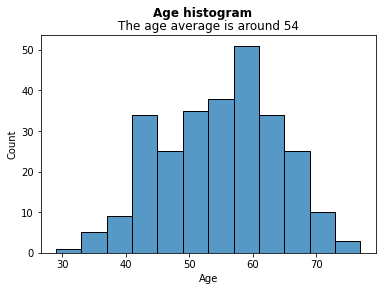

In [ ]:
plt.suptitle('Age histogram', fontweight='heavy')
plt.title('The age average is around 54')
sns.histplot(data=df, x='Age')
plt.show()

Sex

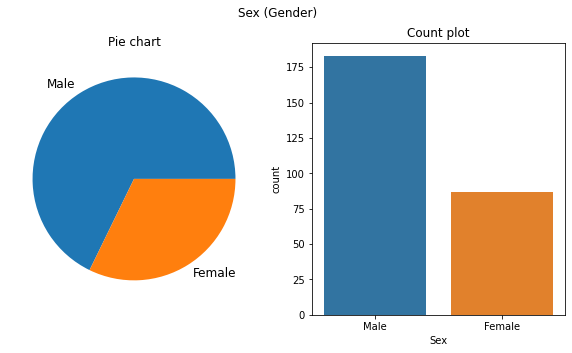

1    183
0     87
Name: Sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [ ]:
labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Sex'].value_counts(), labels=labels, textprops={'fontsize':12})

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

Chest pain type

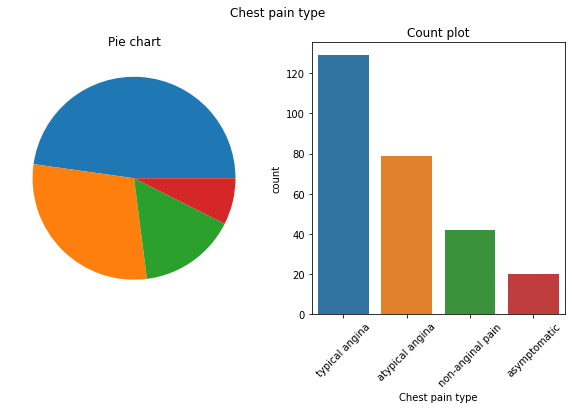

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Chest pain type', data=df, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)

plt.show()

df['Chest pain type'].value_counts()

Resting blood pressure - The average resting heart rate is 131.34. It can be observed that histogram is skewed to right side

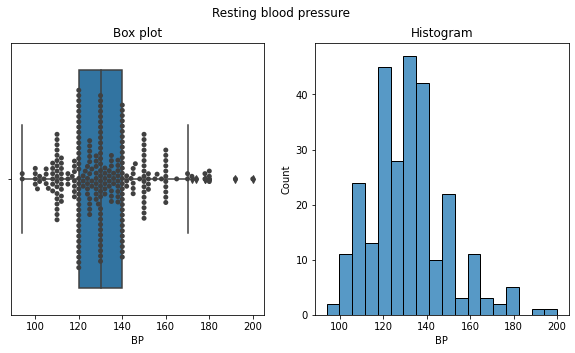

The average resting heart rate: 131.34 It can be observed that histogram is skewed to right side


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Resting blood pressure")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="BP", data=df)
sns.swarmplot(x="BP", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='BP', data=df)
plt.show()

print("The average resting heart rate: %2.2f It can be observed that histogram is skewed to right side" % (df["BP"].mean()))

Cholesterol - histogram resemble a normal distribution

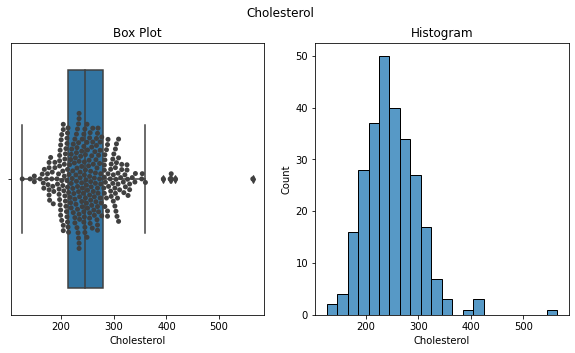

The average resting heart rate: 249.66. The shape of histogram resamble a normal distribution


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Cholesterol")

plt.subplot(1,2,1)
plt.title('Box Plot')
sns.boxplot(x="Cholesterol", data=df)
sns.swarmplot(x="Cholesterol", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Cholesterol', data=df)
plt.show()

print("The average resting heart rate: %2.2f. The shape of histogram resamble a normal distribution" % (df["Cholesterol"].mean()))

FBS over 120

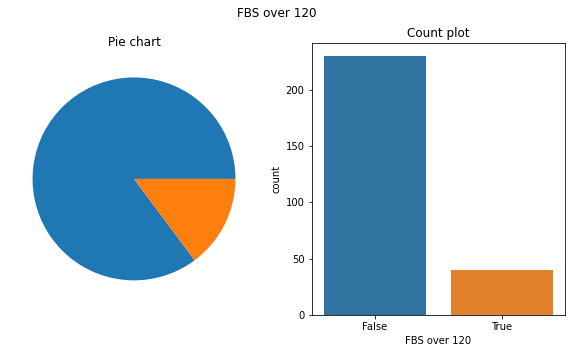

0    230
1     40
Name: FBS over 120, dtype: int64

In [ ]:
labels = ["False", 'True']
order = df['FBS over 120'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("FBS over 120")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['FBS over 120'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='FBS over 120', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['FBS over 120'].value_counts()

EKG results

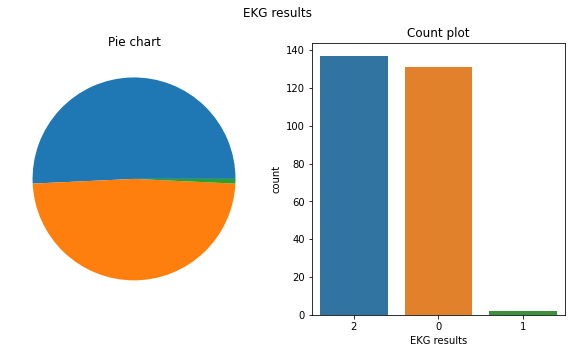

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [ ]:
labels = ["normal", 'aving ST-T wave abnormality', "showing probable or definite left ventricular hypertrophy by Estes' criteria"]
order = df['EKG results'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("EKG results")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['EKG results'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='EKG results', data=df, order=order)
#plt.xticks([0,1,2], labels=labels, rotation=45)

plt.show()

df['EKG results'].value_counts()

Max HR - histogram is slightly left skewed

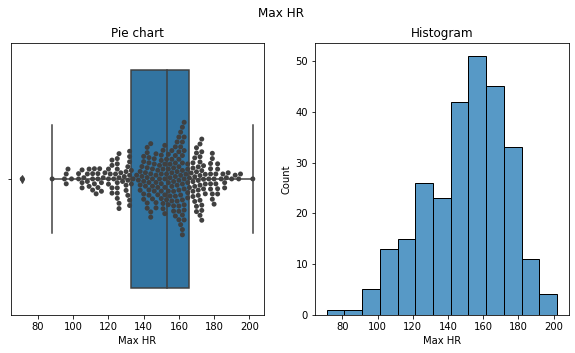

The max heart rate: 149.68 The histogram is slightly left skewed


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("Max HR")

plt.subplot(1,2,1)
plt.title('Pie chart')
sns.boxplot(x="Max HR", data=df)
sns.swarmplot(x="Max HR", data=df, color=".25")

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='Max HR', data=df)
plt.show()

print("The max heart rate: %2.2f The histogram is slightly left skewed" % (df["Max HR"].mean()))

Exercise angina	

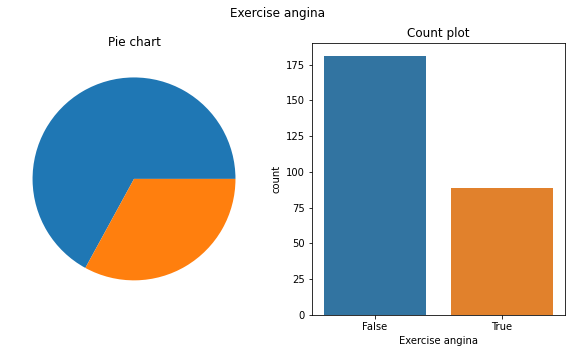

0    181
1     89
Name: Exercise angina, dtype: int64

In [ ]:
labels = ["False", 'True']
order = df['Exercise angina'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Exercise angina")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Exercise angina'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Exercise angina', data=df, order=order)
plt.xticks([0,1], labels=labels)

plt.show()

df['Exercise angina'].value_counts()

ST depression - histogram is left skewed. People are rather healthy

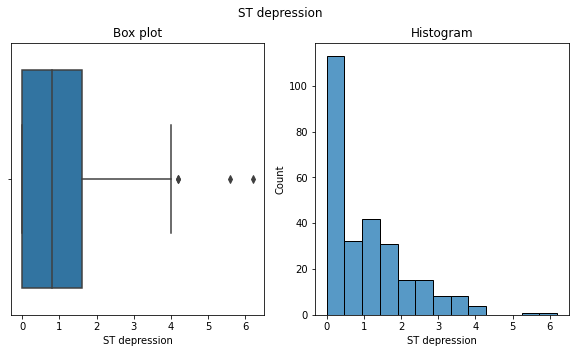

The ST depression average: 1.05 The histogram is left skewed


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle("ST depression")

plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(x="ST depression", data=df)

plt.subplot(1,2,2)
plt.title('Histogram')
sns.histplot(x='ST depression', data=df)
plt.show()

print("The ST depression average: %2.2f The histogram is left skewed" % (df["ST depression"].mean()))

Slope of ST

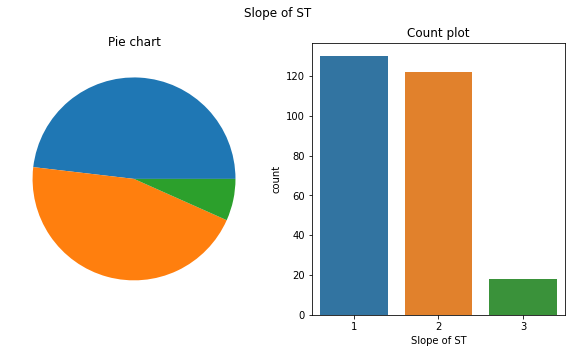

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [ ]:
labels = ["1", '2', '3']
order = df['Slope of ST'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Slope of ST")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Slope of ST'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Slope of ST', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Slope of ST'].value_counts()

Number of vessels fluro

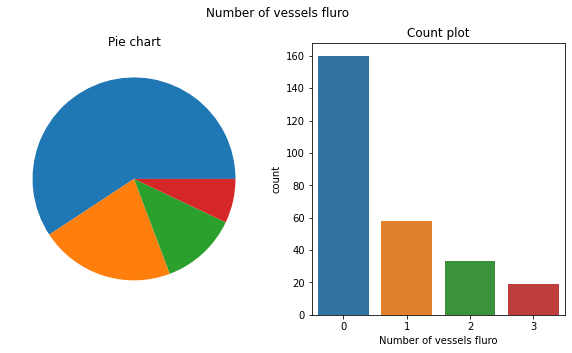

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [ ]:
labels = ["0", '1', '2', "3"]
order = df['Number of vessels fluro'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Number of vessels fluro")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Number of vessels fluro'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Number of vessels fluro', data=df, order=order)
plt.xticks([0,1,2,3], labels=labels)

plt.show()

df['Number of vessels fluro'].value_counts()

Thallium

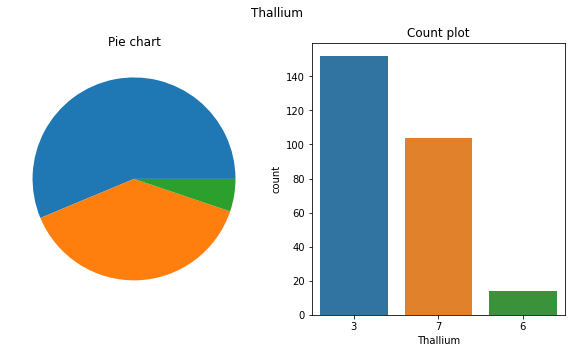

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [ ]:
labels = ["3", '7', '6']
order = df['Thallium'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Thallium")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Thallium'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Thallium', data=df, order=order)
plt.xticks([0,1,2], labels=labels)

plt.show()

df['Thallium'].value_counts()